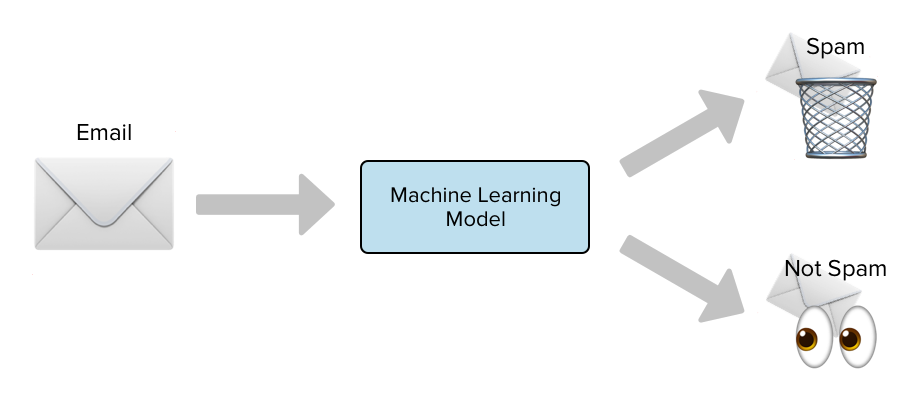

In [1]:
from IPython.display import Image
from IPython.display import display
display(Image(filename="/content/1_CS-OYdiRLCBMBiOpEURy0g.png",height=500,width=900))

In [ ]:
# import necasery laibares
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import nltk
import re     #regular expression used for removing special charaters


In [ ]:
df=pd.read_csv("/content/archive (11).zip",encoding='ISO-8859-1')
df

,sms,label
0,"Go until jurong point, crazy.. Available only ...",0
1,Ok lar... Joking wif u oni...\n,0
2,Free entry in 2 a wkly comp to win FA Cup fina...,1
3,U dun say so early hor... U c already then say...,0
4,"Nah I don't think he goes to usf, he lives aro...",0
...,...,...
5569,This is the 2nd time we have tried 2 contact u...,1
5570,Will Ã¼ b going to esplanade fr home?\n,0
5571,"Pity, * was in mood for that. So...any other s...",0
5572,The guy did some bitching but I acted like i'd...,0


In [ ]:
df.isna().sum()

sms      0
label    0
dtype: int64

In [ ]:
df.columns=["message","output"]
df

,message,output
0,"Go until jurong point, crazy.. Available only ...",0
1,Ok lar... Joking wif u oni...\n,0
2,Free entry in 2 a wkly comp to win FA Cup fina...,1
3,U dun say so early hor... U c already then say...,0
4,"Nah I don't think he goes to usf, he lives aro...",0
...,...,...
5569,This is the 2nd time we have tried 2 contact u...,1
5570,Will Ã¼ b going to esplanade fr home?\n,0
5571,"Pity, * was in mood for that. So...any other s...",0
5572,The guy did some bitching but I acted like i'd...,0


In [ ]:
df.head()

,message,output
0,"Go until jurong point, crazy.. Available only ...",0
1,Ok lar... Joking wif u oni...\n,0
2,Free entry in 2 a wkly comp to win FA Cup fina...,1
3,U dun say so early hor... U c already then say...,0
4,"Nah I don't think he goes to usf, he lives aro...",0


In [ ]:
df.tail()

,message,output
5569,This is the 2nd time we have tried 2 contact u...,1
5570,Will Ã¼ b going to esplanade fr home?\n,0
5571,"Pity, * was in mood for that. So...any other s...",0
5572,The guy did some bitching but I acted like i'd...,0
5573,Rofl. Its true to its name\n,0


In [ ]:
df.columns

Index(['message', 'output'], dtype='object')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5574 entries, 0 to 5573
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   message  5574 non-null   object
 1   output   5574 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 87.2+ KB


In [ ]:
df.describe()

,output
count,5574.000000
mean,0.134015
std,0.340699
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,1.000000


In [ ]:
df.isna().sum()

message    0
output     0
dtype: int64

In [ ]:
# columns  & row counts
print ( "columns_count :", df.shape[1])
print ( "rows_count :", df.shape[0])

columns_count : 2
rows_count : 5574


array([0, 1])

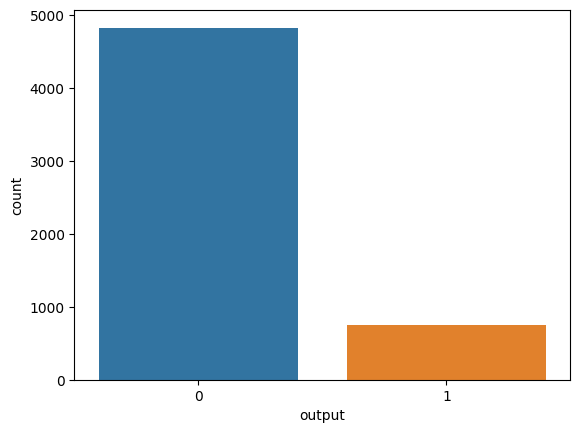

In [ ]:
sns.countplot(x="output",data=df)
df["output"].unique()

In [ ]:
df.dtypes

message    object
output      int64
dtype: object

In [ ]:
# NLP process starting
# --------------------------
# import necasary laibares
nltk.download('wordnet')
nltk.download('omw-1.4')
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
# input data preprocessing
# step 1:- take input data

twitter=df['message']
twitter

0       Go until jurong point, crazy.. Available only ...
1                         Ok lar... Joking wif u oni...\n
2       Free entry in 2 a wkly comp to win FA Cup fina...
3       U dun say so early hor... U c already then say...
4       Nah I don't think he goes to usf, he lives aro...
                              ...                        
5569    This is the 2nd time we have tried 2 contact u...
5570              Will Ã¼ b going to esplanade fr home?\n
5571    Pity, * was in mood for that. So...any other s...
5572    The guy did some bitching but I acted like i'd...
5573                         Rofl. Its true to its name\n
Name: message, Length: 5574, dtype: object

In [ ]:
#step 2:- preprocessing
   #tokenizing

from nltk.tokenize import TweetTokenizer
tk=TweetTokenizer()
tweets=twitter.apply(lambda x :tk.tokenize(x)).apply(lambda  x:" ".join(x))
tweets

0       Go until jurong point , crazy .. Available onl...
1                         Ok lar ... Joking wif u oni ...
2       Free entry in 2 a wkly comp to win FA Cup fina...
3       U dun say so early hor ... U c already then sa...
4       Nah I don't think he goes to usf , he lives ar...
                              ...                        
5569    This is the 2nd time we have tried 2 contact u...
5570              Will Ã ¼ b going to esplanade fr home ?
5571    Pity , * was in mood for that . So ... any oth...
5572    The guy did some bitching but I acted like i'd...
5573                          Rofl . Its true to its name
Name: message, Length: 5574, dtype: object

In [ ]:
#step 3:- removing special charters
# re using : recular expression

tweet=tweets.str.replace('[^a-zA-Z0-9]+',' ')
tweet

<ipython-input-19-690517a5e7d5>:4: FutureWarning: The default value of regex will change from True to False in a future version.
  tweet=tweets.str.replace('[^a-zA-Z0-9]+',' ')


0       Go until jurong point crazy Available only in ...
1                                Ok lar Joking wif u oni 
2       Free entry in 2 a wkly comp to win FA Cup fina...
3            U dun say so early hor U c already then say 
4       Nah I don t think he goes to usf he lives arou...
                              ...                        
5569    This is the 2nd time we have tried 2 contact u...
5570                   Will b going to esplanade fr home 
5571    Pity was in mood for that So any other suggest...
5572    The guy did some bitching but I acted like i d...
5573                            Rofl Its true to its name
Name: message, Length: 5574, dtype: object

In [ ]:
#step 4:- stemming (Stemming is the process of reducing words to their base or root form)
from nltk.stem import SnowballStemmer
stemmer=SnowballStemmer('english')
tweets=tweet.apply(lambda x :[stemmer.stem(i.lower())for i in tk.tokenize(x)]).apply(lambda x:" ".join(x))
tweets

0       go until jurong point crazi avail onli in bugi...
1                                   ok lar joke wif u oni
2       free entri in 2 a wkli comp to win fa cup fina...
3             u dun say so earli hor u c alreadi then say
4       nah i don t think he goe to usf he live around...
                              ...                        
5569    this is the 2nd time we have tri 2 contact u u...
5570                        will b go to esplanad fr home
5571       piti was in mood for that so ani other suggest
5572    the guy did some bitch but i act like i d be i...
5573                              rofl it true to it name
Name: message, Length: 5574, dtype: object

In [ ]:
#step5:- remove stop word
from nltk.corpus import stopwords
stop=stopwords.words('english')
ss=tweets.apply(lambda x :[i for i in tk.tokenize(x) if i not in stop]).apply(lambda x: " ".join(x))
ss


0       go jurong point crazi avail onli bugi n great ...
1                                   ok lar joke wif u oni
2       free entri 2 wkli comp win fa cup final tkts 2...
3                     u dun say earli hor u c alreadi say
4                    nah think goe usf live around though
                              ...                        
5569    2nd time tri 2 contact u u 750 pound prize 2 c...
5570                                b go esplanad fr home
5571                                piti mood ani suggest
5572    guy bitch act like interest buy someth els nex...
5573                                       rofl true name
Name: message, Length: 5574, dtype: object

In [ ]:
#step6:- vectorization(the process of converting data into numerical)

from sklearn.feature_extraction.text import TfidfVectorizer
vec = TfidfVectorizer()
train_data=vec.fit_transform(ss)
train_data

<5574x7172 sparse matrix of type '<class 'numpy.float64'>'
	with 47311 stored elements in Compressed Sparse Row format>

In [ ]:
print(train_data)

  (0, 6851)	0.19123032385493835
  (0, 1086)	0.3461692784650296
  (0, 3096)	0.16229286041590288
  (0, 1862)	0.29244736325349263
  (0, 1630)	0.33045662553219424
  (0, 3825)	0.29244736325349263
  (0, 7023)	0.23206587761404396
  (0, 3134)	0.19087642029634594
  (0, 1632)	0.29244736325349263
  (0, 4691)	0.16526852886898225
  (0, 1272)	0.2589268352198124
  (0, 2066)	0.2680874134117821
  (0, 4995)	0.23637611237105027
  (0, 3715)	0.3461692784650296
  (0, 3057)	0.13877316048723254
  (1, 4689)	0.5647876999609088
  (1, 6946)	0.4459772022866927
  (1, 3682)	0.4745431066842695
  (1, 3856)	0.42190021648154313
  (1, 4663)	0.2809416954541812
  (2, 380)	0.1499973900792025
  (2, 79)	0.23462449302215652
  (2, 1157)	0.16702968117177477
  (2, 5255)	0.16136585235189127
  (2, 6577)	0.12387066545266243
  :	:
  (5569, 4691)	0.1735729398161315
  (5570, 2600)	0.6649976294932106
  (5570, 2883)	0.5738650190127271
  (5570, 3342)	0.3744524418748561
  (5570, 3057)	0.29705632714333907
  (5571, 4946)	0.6038244752365266
 

In [ ]:
train_data.shape

(5574, 7172)

In [ ]:
y=df["output"].values
y

array([0, 0, 1, ..., 0, 0, 0])

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(train_data,y,test_size=0.30,random_state=42)
x_train

<3901x7172 sparse matrix of type '<class 'numpy.float64'>'
	with 33267 stored elements in Compressed Sparse Row format>

In [ ]:
print(x_test)

  (0, 1941)	0.4852407131019283
  (0, 6465)	0.6729035634145998
  (0, 6039)	0.5583388260655585
  (1, 2918)	0.24410993820265703
  (1, 490)	0.24410993820265703
  (1, 2848)	0.24410993820265703
  (1, 6576)	0.24410993820265703
  (1, 4622)	0.24410993820265703
  (1, 7048)	0.24410993820265703
  (1, 5979)	0.24410993820265703
  (1, 3344)	0.22516826108363813
  (1, 5857)	0.20012872593572195
  (1, 1478)	0.233029767387263
  (1, 4309)	0.20012872593572195
  (1, 5950)	0.21907040305474088
  (1, 2713)	0.1856282139467244
  (1, 5794)	0.14434816809401974
  (1, 2184)	0.20012872593572195
  (1, 2016)	0.1602690603757965
  (1, 3474)	0.14330369457866524
  (1, 1307)	0.14229767679208863
  (1, 2143)	0.38701457775450643
  (1, 2178)	0.11184032858661384
  (1, 1681)	0.08765654821583489
  (1, 3293)	0.13410889635349674
  :	:
  (1670, 1061)	0.28583354560364477
  (1670, 4658)	0.21933321739541278
  (1670, 3077)	0.2490658425569008
  (1670, 1681)	0.14309953606601464
  (1670, 1313)	0.20649928852499044
  (1670, 4663)	0.17789696433

In [ ]:
print(y_train)

[0 1 0 ... 0 0 0]


In [ ]:
y_test

array([0, 0, 0, ..., 0, 0, 0])

In [ ]:
from sklearn.naive_bayes import MultinomialNB
navies_model=MultinomialNB()

[0 0 0 ... 0 0 0]
[[1447    0]
 [  46  180]]
0.972504482964734
              precision    recall  f1-score   support

           0       0.97      1.00      0.98      1447
           1       1.00      0.80      0.89       226

    accuracy                           0.97      1673
   macro avg       0.98      0.90      0.94      1673
weighted avg       0.97      0.97      0.97      1673

****************************************************************************************************


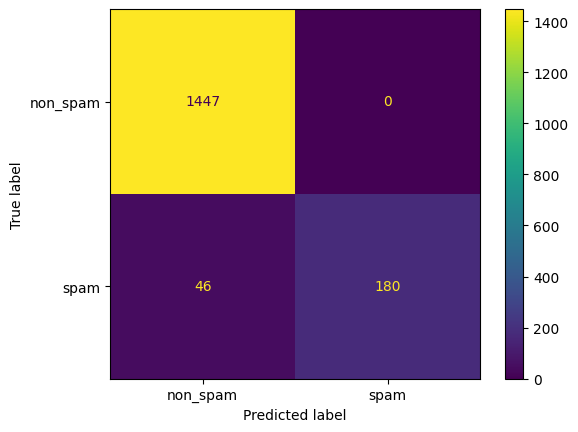

In [ ]:
from sklearn.metrics import confusion_matrix,accuracy_score,ConfusionMatrixDisplay,classification_report
navies_model.fit(x_train,y_train)
y_prede=navies_model.predict(x_test)
result=confusion_matrix(y_test,y_prede)
score=accuracy_score(y_test,y_prede)
report=classification_report(y_test,y_prede)
cm=["non_spam","spam"]
cmd=ConfusionMatrixDisplay(result,display_labels=cm)
print(y_prede)
print(result)
print(score)
print(report)
print(cmd.plot())
print("*"*100)